<a href="https://colab.research.google.com/github/penzen/Codes-/blob/master/Onehot_Encoding_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets 
import keras 
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical # it allows us to make a call to the funtion and outputs them as onehot input format 



In [ ]:
n_pts = 500
centers = [[-1, 1],[-1, -1],[1, -1], [1, 1], [0, 0]] #data classification (-1,1) 0, (-1,-1) 1, (1,-1) 2
X, y = datasets.make_blobs(n_samples=n_pts, random_state= 123, centers = centers, cluster_std= 0.4) #cluster_std used for spacing out the data. 





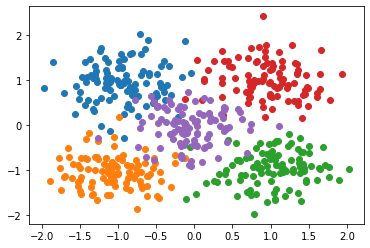

In [ ]:
plt.scatter(X[y==0, 0],X[y==0, 1])
plt.scatter(X[y==1, 0],X[y==1, 1])
plt.scatter(X[y==2, 0],X[y==2, 1])
plt.scatter(X[y==3, 0],X[y==3, 1])
plt.scatter(X[y==4, 0],X[y==4, 1])


In [ ]:
print(y)
y_cat = to_categorical(y, 5) # 5 datasets
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [ ]:
model = Sequential()
model.add(Dense(units = 5,input_shape = (2, ), activation= 'softmax'))
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics =['accuracy'])

In [ ]:
model.fit(x = X, y = y_cat, verbose=1, batch_size = 1, epochs=20)

Epoch 1/20
500/500 [==============================] - 1s 1ms/step - loss: 0.6034 - accuracy: 0.7903
Epoch 2/20
500/500 [==============================] - 0s 987us/step - loss: 0.1974 - accuracy: 0.9387
Epoch 3/20
500/500 [==============================] - 0s 945us/step - loss: 0.1937 - accuracy: 0.9442
Epoch 4/20
500/500 [==============================] - 0s 945us/step - loss: 0.2262 - accuracy: 0.9090
Epoch 5/20
500/500 [==============================] - 0s 948us/step - loss: 0.1700 - accuracy: 0.9589
Epoch 6/20
500/500 [==============================] - 0s 959us/step - loss: 0.1704 - accuracy: 0.9373
Epoch 7/20
500/500 [==============================] - 0s 957us/step - loss: 0.1901 - accuracy: 0.9208
Epoch 8/20
500/500 [==============================] - 0s 905us/step - loss: 0.2005 - accuracy: 0.9283
Epoch 9/20
500/500 [==============================] - 0s 928us/step - loss: 0.2117 - accuracy: 0.9112
Epoch 10/20
500/500 [==============================] - 0s 961us/step - loss: 0.2089 

In [ ]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()] # ravel flattens the array and .c makes sure that the array are of the same shape.
    pred_func = model.predict_classes(grid) # this predict_classes is used for multiclass array 
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


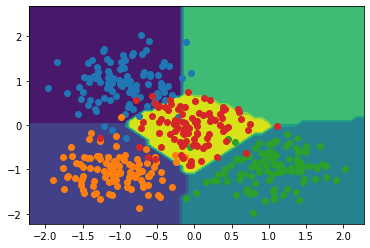

In [ ]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0],X[y==0, 1])
plt.scatter(X[y==1, 0],X[y==1, 1])
plt.scatter(X[y==2, 0],X[y==2, 1])
plt.scatter(X[y==4, 0],X[y==4, 1])
plt.scatter(X[y==5, 0],X[y==5, 1])

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict [3]  yolo


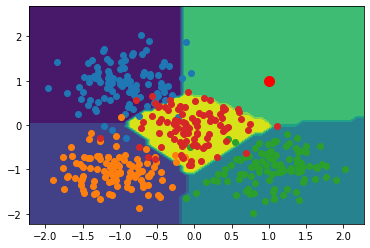

In [ ]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0],X[y==0, 1])
plt.scatter(X[y==1, 0],X[y==1, 1])
plt.scatter(X[y==2, 0],X[y==2, 1])
plt.scatter(X[y==4, 0],X[y==4, 1])
plt.scatter(X[y==5, 0],X[y==5, 1])
x = 1
y = 1
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color= "r" )
print("Predict",prediction," yolo")